In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/building_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [6]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

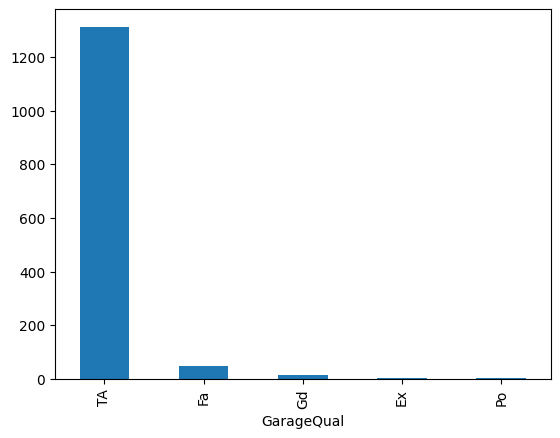

In [8]:
df['GarageQual'].value_counts().plot(kind='bar')

In [12]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

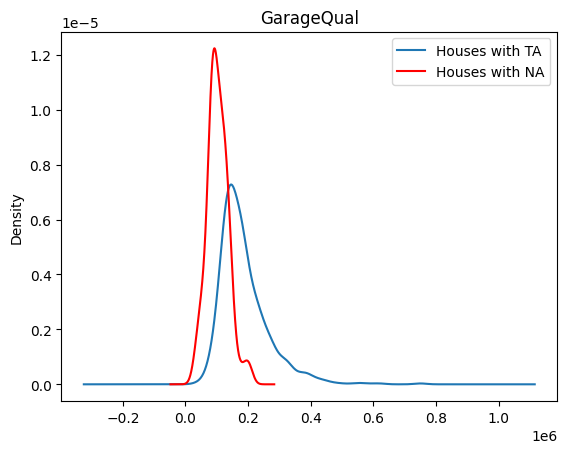

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [23]:
temp=df[df['GarageQual']=='TA']['SalePrice']


In [27]:
temp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

<Axes: xlabel='GarageQual'>

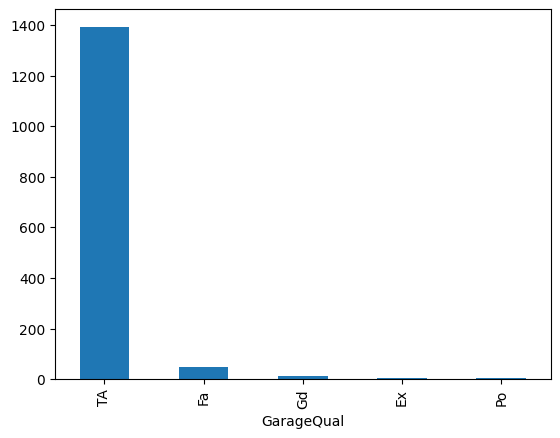

In [25]:
df['GarageQual'].fillna('TA',inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

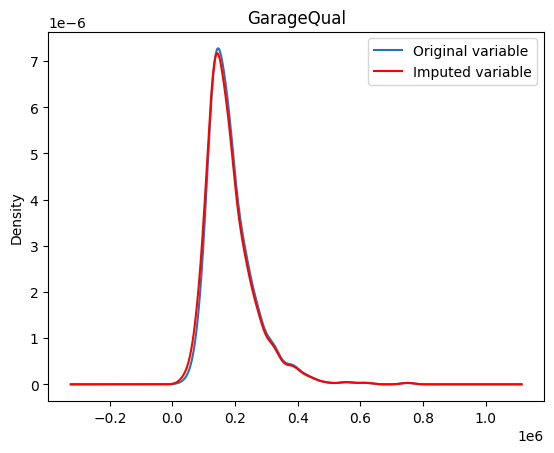

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

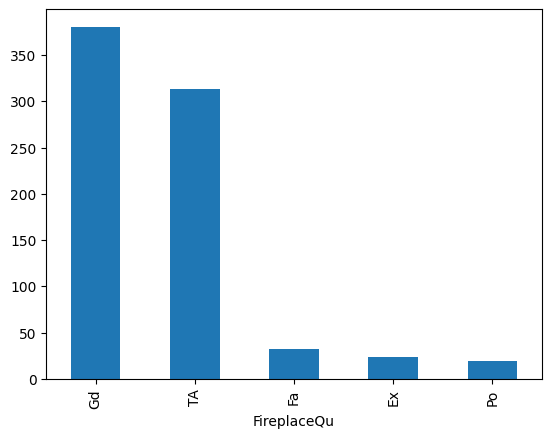

In [31]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [32]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQU')

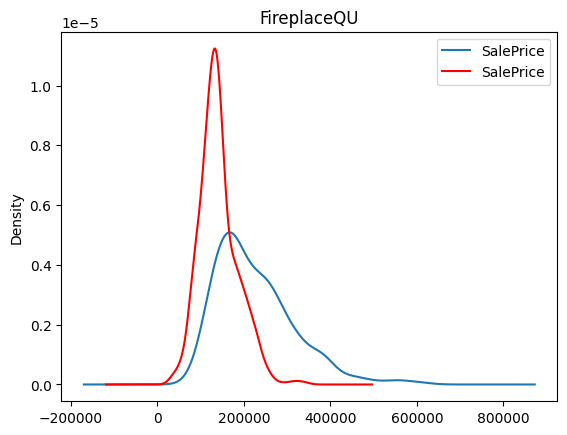

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labes=['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title("FireplaceQU")

In [37]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']
temp

3       140000
6       307000
11      345000
13      279500
20      325300
         ...  
1437    394617
1440    191000
1443    121000
1451    287090
1457    266500
Name: SalePrice, Length: 380, dtype: int64

<Axes: xlabel='FireplaceQu'>

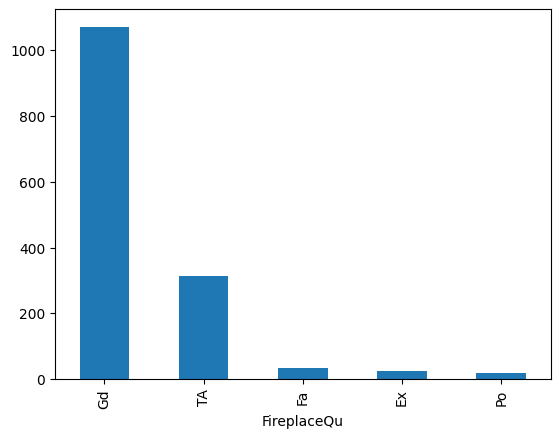

In [40]:
# df.fillna({"FireplaceQu",'Gd'},inplace=True)
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQU')

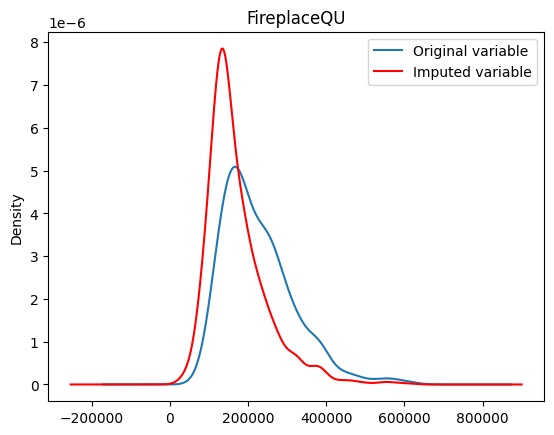

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title("FireplaceQU")

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["SalePrice"]),df['SalePrice'],test_size=0.2)

In [47]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [48]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)